In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.isnull().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

In [4]:
df["Name"].isnull().any()

True

In [5]:
df["Name"].dropna(inplace=True)

In [6]:
df["Name"].isnull().value_counts() #Name is dropped since its not replaceable

False    16717
Name: Name, dtype: int64

In [7]:
df["Rating"].value_counts()

E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 1.7+ MB


In [9]:
df.dropna(inplace = True) #All the null values are dropped as most of the same rows had more than one null values

In [10]:
#We have dropped all the nan values of avoid issues
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(10), object(6)
memory usage: 746.5+ KB


In [11]:
df["Rating"].value_counts()

T       2377
E       2082
M       1433
E10+     930
K-A        1
RP         1
AO         1
Name: Rating, dtype: int64

In [12]:
df.drop(df[(df["Rating"] == "K-A") | (df["Rating"] == "AO") | (df["Rating"] == "RP")].index,inplace = True)

In [13]:
df["Rating"].value_counts() #Rows with K-A, AO and RP is dropped since it had only 1 count

T       2377
E       2082
M       1433
E10+     930
Name: Rating, dtype: int64

In [14]:
def changer(x):
    if x == "E":
        return "0"
    elif x == "E10+":
        return "1"
    elif x == "T":
        return "2"
    elif x == "M":
        return "3"

In [15]:
#We have changed the categories of Rating to numbers to ease the columns while doing visulization
df["Rating"] = df["Rating"].apply(lambda x:changer(x))

In [16]:
df["Rating"].value_counts()

2    2377
0    2082
3    1433
1     930
Name: Rating, dtype: int64

In [17]:
df.sample(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
11163,The Mummy: Tomb of the Dragon Emperor,Wii,2008.0,Action,Vivendi Games,0.08,0.00,0.00,0.01,0.09,39.0,7.0,6.4,5.0,Eurocom Entertainment Software,2
5115,Theatrhythm Final Fantasy: Curtain Call,3DS,2014.0,Misc,Square Enix,0.13,0.08,0.15,0.02,0.37,83.0,52.0,8.2,66.0,Indies Zero,2
5823,Ultimate Spider-Man,GBA,2005.0,Action,Activision,0.22,0.08,0.00,0.01,0.30,62.0,4.0,7.3,12.0,Vicarious Visions,1
12295,IL-2 Sturmovik: Birds of Prey,DS,2009.0,Simulation,505 Games,0.06,0.00,0.00,0.00,0.06,41.0,4.0,2.4,5.0,DiP Interactive,1
3837,We Cheer,Wii,2008.0,Simulation,505 Games,0.47,0.00,0.00,0.04,0.52,56.0,12.0,7.3,13.0,"Machatin, Inc.",1


In [18]:
df["Year_of_Release"].value_counts()

2008.0    592
2007.0    590
2005.0    561
2009.0    550
2006.0    528
2003.0    498
2004.0    476
2002.0    455
2011.0    452
2010.0    429
2012.0    313
2013.0    266
2001.0    256
2014.0    253
2016.0    212
2015.0    211
2000.0    102
1999.0     30
1998.0     25
1997.0     13
1996.0      6
1994.0      1
1985.0      1
1992.0      1
1988.0      1
Name: Year_of_Release, dtype: int64

In [74]:
#We have dropped the year rows which only had a presence within 1-30 

In [19]:
df.drop(df[(df["Year_of_Release"] == 1999) | (df["Year_of_Release"] == 1998) | (df["Year_of_Release"] == 1997) | (df["Year_of_Release"] == 1996) | (df["Year_of_Release"] == 1994) | (df["Year_of_Release"] == 1985) | (df["Year_of_Release"] == 1992) | (df["Year_of_Release"] == 1988)].index , inplace = True)

In [20]:
df["Year_of_Release"].value_counts()

2008.0    592
2007.0    590
2005.0    561
2009.0    550
2006.0    528
2003.0    498
2004.0    476
2002.0    455
2011.0    452
2010.0    429
2012.0    313
2013.0    266
2001.0    256
2014.0    253
2016.0    212
2015.0    211
2000.0    102
Name: Year_of_Release, dtype: int64

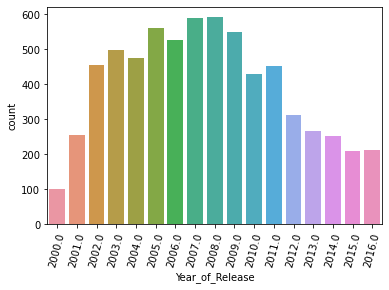

In [21]:
#Since we didnt consider the Mobile games, we can see how less games are released afer 2012
sns.countplot(df["Year_of_Release"])
plt.xticks(rotation=75)
plt.show()

In [24]:
df["Platform"].value_counts()

PS2     1140
X360     858
PS3      769
PC       639
XB       564
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PSV      118
WiiU      89
PS        85
DC        11
Name: Platform, dtype: int64

In [25]:
df["Genre"].value_counts()

Action          1618
Sports           941
Shooter          859
Role-Playing     691
Racing           575
Platform         397
Misc             382
Fighting         369
Simulation       291
Strategy         260
Adventure        245
Puzzle           116
Name: Genre, dtype: int64

In [26]:
df.drop(["Publisher","Developer"],axis=1,inplace = True) #To reduce features of Developer and Publish which had a lot of catogorical variables

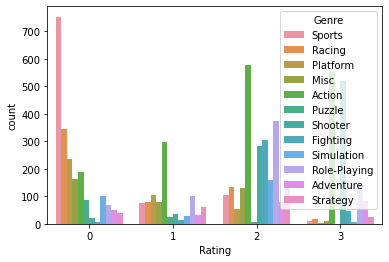

In [27]:
#We can see that most people of all ages are able to play Sports whereas as age increase people play more action games 
sns.countplot(df["Rating"],hue=df["Genre"])

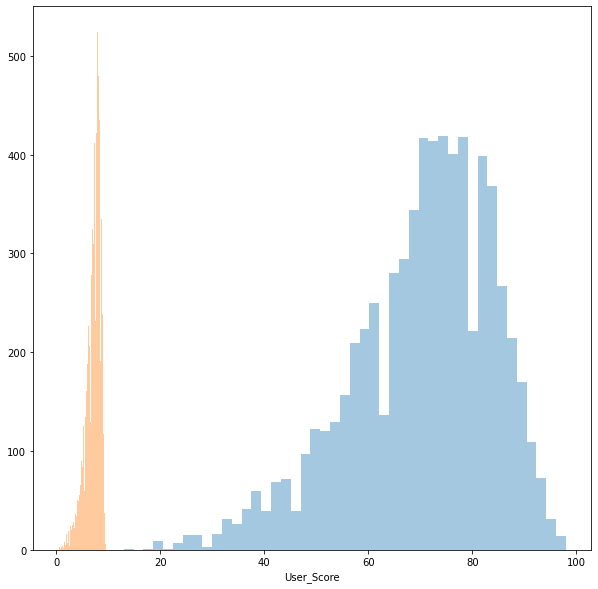

In [31]:
#We can conclude that critics scores less than users
plt.figure(figsize=(10,10))
for a in [df["Critic_Score"],df["User_Score"]]:
    sns.distplot(a,kde=False)


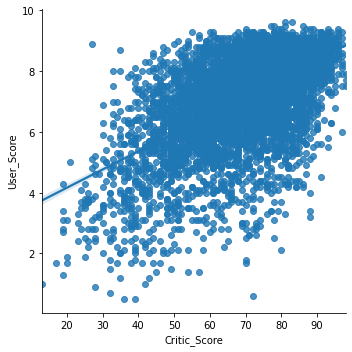

In [32]:
#Critic Score and User Score have a linear relationship between them
sns.lmplot(x="Critic_Score",y="User_Score",data=df)

In [35]:
df["Critic_Score_Value"] = df["Critic_Score"] * df["Critic_Count"]
df["User_Score_Value"] = df["User_Score"] * df["User_Count"]

In [36]:
df.drop(labels=["Critic_Score","Critic_Count","User_Score","User_Count"],axis=1,inplace=True)

In [37]:
#We have done Dimensionality reduction to get efficient results in less columns
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score_Value,User_Score_Value
7394,Cabela's Deer Hunt: 2004 Season,XB,2003.0,Sports,0.16,0.05,0.0,0.01,0.21,2,325.0,134.4
11638,TrackMania DS,DS,2008.0,Racing,0.06,0.01,0.0,0.01,0.08,0,2850.0,82.8
4088,You're in the Movies,X360,2008.0,Misc,0.27,0.17,0.0,0.05,0.48,0,1155.0,110.0
2688,Star Wars Battlefront: Elite Squadron,PSP,2009.0,Shooter,0.38,0.23,0.0,0.15,0.76,2,1575.0,328.0
2920,NASCAR 2001,PS2,2000.0,Racing,0.34,0.27,0.0,0.09,0.70,0,1056.0,59.4


In [38]:
conversion = df.loc[:,["Critic_Score_Value","User_Score_Value"]]

In [40]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_fitted = scale.fit_transform(conversion)
df_numeric_scaled_3_library = pd.DataFrame(scaled_fitted, columns=conversion.columns)

In [41]:
#We have used StandardScaler so that the weightage of Critic_Score_Value and User_Score_Value are similar
df_numeric_scaled_3_library

,Critic_Score_Value,User_Score_Value
0,1.050152,0.302661
1,2.333595,1.061303
2,2.244788,0.064202
3,2.211334,0.552010
4,0.138968,-0.092767
...,...,...
6739,-1.195570,-0.276426
6740,-0.716256,-0.269823
6741,-0.334264,0.429961
6742,-0.862240,-0.230798


In [42]:
df_numeric_scaled_3_library["Critic_Score_Value"].values

array([ 1.05015172,  2.33359523,  2.24478824, ..., -0.33426413,
       -0.86223995, -0.86953915])

In [43]:
practice = df.copy()

In [44]:
practice["Critic_Score_Value"] = df_numeric_scaled_3_library["Critic_Score_Value"].values
practice["User_Score_Value"] = df_numeric_scaled_3_library["User_Score_Value"].values

In [45]:
df = practice

In [46]:
df

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score_Value,User_Score_Value
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.53,0,1.050152,0.302661
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,0,2.333595,1.061303
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,0,2.244788,0.064202
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,29.80,0,2.211334,0.552010
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,28.92,0,0.138968,-0.092767
...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,0.01,0.00,0.00,0.00,0.01,0,-1.195570,-0.276426
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,0.01,0.00,0.00,0.00,0.01,3,-0.716256,-0.269823
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.00,0.01,3,-0.334264,0.429961
16700,Breach,PC,2011.0,Shooter,0.01,0.00,0.00,0.00,0.01,2,-0.862240,-0.230798


In [47]:
rating_colum  =df.pop("Rating")

In [48]:
df["Rating"] = rating_colum.values

In [53]:
#Since we could not conclude with the sales values,the sales columns are dropped
df.drop(["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"],axis=1,inplace = True)

In [54]:
df

,Name,Platform,Year_of_Release,Genre,Critic_Score_Value,User_Score_Value,Rating
0,Wii Sports,Wii,2006.0,Sports,1.050152,0.302661,0
2,Mario Kart Wii,Wii,2008.0,Racing,2.333595,1.061303,0
3,Wii Sports Resort,Wii,2009.0,Sports,2.244788,0.064202,0
6,New Super Mario Bros.,DS,2006.0,Platform,2.211334,0.552010,0
7,Wii Play,Wii,2006.0,Misc,0.138968,-0.092767,0
...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,-1.195570,-0.276426,0
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,-0.716256,-0.269823,3
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,-0.334264,0.429961,3
16700,Breach,PC,2011.0,Shooter,-0.862240,-0.230798,2


In [55]:
pd.crosstab(df["Year_of_Release"],df["Rating"])

Rating,0,1,2,3
Year_of_Release,,,,
2000.0,44,0,46,12
2001.0,131,0,99,26
2002.0,215,0,182,58
2003.0,214,3,202,79
2004.0,187,9,188,92
2005.0,161,75,193,132
2006.0,155,106,189,78
2007.0,196,123,191,80
2008.0,178,119,206,89


In [56]:
#We can conclude that more 2 -> Teen Level and 3-> Mature Rating are sold in the market as the number of year increases

In [57]:
pd.crosstab(df["Genre"],df["Rating"])
#More Action games are sold in the market than other Genre
#Shooter games have a rating of Mature

Rating,0,1,2,3
Genre,,,,
Action,190,299,578,551
Adventure,49,32,81,83
Fighting,5,14,305,45
Misc,162,80,129,11
Platform,237,104,53,3
Puzzle,87,24,5,0
Racing,345,79,134,17
Role-Playing,69,100,373,149
Shooter,20,34,284,521


In [58]:
#This shows how the consoles are unused after a certain number of years
pd.crosstab(df["Year_of_Release"],df["Platform"])

Platform,3DS,DC,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
Year_of_Release,,,,,,,,,,,,,,,,,
2000.0,0,7,0,0,0,4,50,40,0,0,0,0,0,0,0,1,0
2001.0,0,4,0,29,20,11,34,132,0,0,0,0,0,0,0,26,0
2002.0,0,0,0,55,97,17,1,181,0,0,0,0,0,0,0,104,0
2003.0,0,0,0,65,95,27,0,180,0,0,0,0,0,0,0,131,0
2004.0,0,0,11,54,53,23,0,201,0,0,6,0,0,0,0,128,0
2005.0,0,0,57,23,57,27,0,181,0,0,68,0,0,0,16,132,0
2006.0,0,0,71,11,24,38,0,117,19,0,100,0,33,0,76,39,0
2007.0,0,0,104,0,2,51,0,61,76,0,75,0,113,0,105,3,0
2008.0,0,0,108,0,0,53,0,34,109,0,42,0,126,0,120,0,0


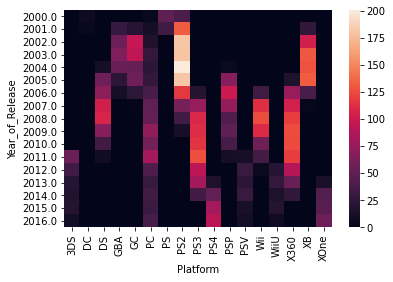

In [73]:
#We can see that there are always sales of PC games
sns.heatmap(pd.crosstab(df["Year_of_Release"],df["Platform"]))